In [299]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
import scipy.stats as stats 
import seaborn as sns 
import sklearn as skl 
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.model_selection import KFold
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error
from sklearn import metrics
import math 

In [300]:
df = pd.read_csv('data/study_data.csv')

In [301]:
vanilla_df = df

In [302]:
vanilla_df[['fico_start','fico_end']] = df['fico_range'].str.split('-',expand=True).astype(int)

In [303]:
vanilla_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2498 entries, 0 to 2497
Data columns (total 7 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   interest_rate               2498 non-null   float64
 1   fico_range                  2498 non-null   object 
 2   amount_requested            2498 non-null   float64
 3   amount_funded_by_investors  2498 non-null   float64
 4   loan_length                 2498 non-null   float64
 5   fico_start                  2498 non-null   int32  
 6   fico_end                    2498 non-null   int32  
dtypes: float64(4), int32(2), object(1)
memory usage: 117.2+ KB


In [304]:
vanilla_df = vanilla_df.drop('fico_range',axis=1)

In [305]:
vanilla_df['fico_average'] = (vanilla_df['fico_end'] + vanilla_df['fico_start'])/2

In [306]:
vanilla_df = vanilla_df.drop('fico_start', axis=1)
vanilla_df = vanilla_df.drop('fico_end',axis=1)

In [307]:
vanilla_df

,interest_rate,amount_requested,amount_funded_by_investors,loan_length,fico_average
0,8.90,20000.0,20000.00,36.0,737.0
1,12.12,19200.0,19200.00,36.0,717.0
2,21.98,35000.0,35000.00,60.0,692.0
3,9.99,10000.0,9975.00,36.0,697.0
4,11.71,12000.0,12000.00,36.0,697.0
...,...,...,...,...,...
2493,16.77,30000.0,29950.00,60.0,707.0
2494,14.09,16000.0,16000.00,60.0,742.0
2495,13.99,10000.0,10000.00,36.0,682.0
2496,12.42,6000.0,6000.00,36.0,677.0


In [308]:
# vanilla_df['fico_range'] = vanilla_df['fico_range'].apply(lambda x: int(x.split('-')[0] + x.split('-')[1]))

In [309]:
vanilla_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2498 entries, 0 to 2497
Data columns (total 5 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   interest_rate               2498 non-null   float64
 1   amount_requested            2498 non-null   float64
 2   amount_funded_by_investors  2498 non-null   float64
 3   loan_length                 2498 non-null   float64
 4   fico_average                2498 non-null   float64
dtypes: float64(5)
memory usage: 97.7 KB


In [310]:
vanilla_df

,interest_rate,amount_requested,amount_funded_by_investors,loan_length,fico_average
0,8.90,20000.0,20000.00,36.0,737.0
1,12.12,19200.0,19200.00,36.0,717.0
2,21.98,35000.0,35000.00,60.0,692.0
3,9.99,10000.0,9975.00,36.0,697.0
4,11.71,12000.0,12000.00,36.0,697.0
...,...,...,...,...,...
2493,16.77,30000.0,29950.00,60.0,707.0
2494,14.09,16000.0,16000.00,60.0,742.0
2495,13.99,10000.0,10000.00,36.0,682.0
2496,12.42,6000.0,6000.00,36.0,677.0


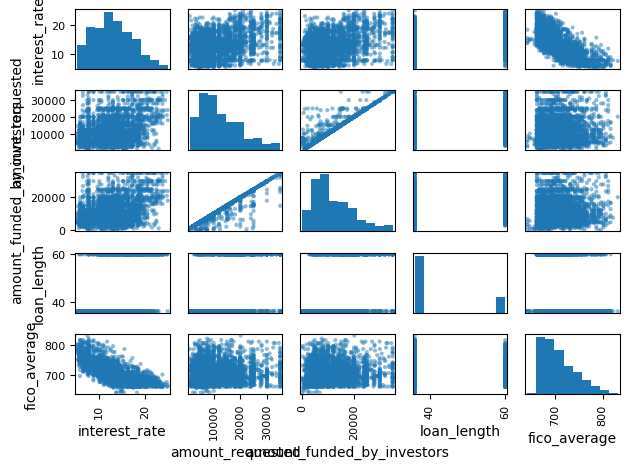

In [311]:
pd.plotting.scatter_matrix(vanilla_df)
plt.tight_layout()

In [312]:
y = vanilla_df['interest_rate']
X = vanilla_df.drop('interest_rate',axis=1)

In [313]:
X

,amount_requested,amount_funded_by_investors,loan_length,fico_average
0,20000.0,20000.00,36.0,737.0
1,19200.0,19200.00,36.0,717.0
2,35000.0,35000.00,60.0,692.0
3,10000.0,9975.00,36.0,697.0
4,12000.0,12000.00,36.0,697.0
...,...,...,...,...
2493,30000.0,29950.00,60.0,707.0
2494,16000.0,16000.00,60.0,742.0
2495,10000.0,10000.00,36.0,682.0
2496,6000.0,6000.00,36.0,677.0


In [314]:
y

0        8.90
1       12.12
2       21.98
3        9.99
4       11.71
        ...  
2493    16.77
2494    14.09
2495    13.99
2496    12.42
2497    13.79
Name: interest_rate, Length: 2498, dtype: float64